In [ ]:
!pip install pycryptodome


In [ ]:
import os
import base64
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
from Crypto.Util.Padding import pad, unpad


# AES-256 requires a key size of 32 bytes (256 bits)
KEY_SIZE = 32
BLOCK_SIZE = AES.block_size  # 16 bytes

# Key generation function
def generate_key():
    """Generates a random 256-bit key for AES encryption."""
    return get_random_bytes(KEY_SIZE)

# Encryption function
def encrypt_data(key, plaintext):
    """Encrypts plaintext using AES-256 encryption.

    Args:
        key (bytes): 256-bit encryption key.
        plaintext (str): Data to be encrypted.

    Returns:
        bytes: Encrypted data (ciphertext).
        bytes: Initialization vector (IV).
    """
    if len(key) != KEY_SIZE:
        raise ValueError("Key must be 256 bits (32 bytes).")

    cipher = AES.new(key, AES.MODE_CBC)
    iv = cipher.iv
    padded_data = pad(plaintext.encode(), BLOCK_SIZE)
    ciphertext = cipher.encrypt(padded_data)
    return ciphertext, iv

# Decryption function
def decrypt_data(key, ciphertext, iv):
    """Decrypts AES-256 encrypted data.

    Args:
        key (bytes): 256-bit decryption key.
        ciphertext (bytes): Encrypted data.
        iv (bytes): Initialization vector.

    Returns:
        str: Decrypted plaintext.
    """
    if len(key) != KEY_SIZE:
        raise ValueError("Key must be 256 bits (32 bytes).")

    cipher = AES.new(key, AES.MODE_CBC, iv)
    decrypted_data = unpad(cipher.decrypt(ciphertext), BLOCK_SIZE)
    return decrypted_data.decode()

# File encryption
def encrypt_file(input_file, output_file, key):
    """Encrypts a file using AES-256 encryption.

    Args:
        input_file (str): Path to the input file.
        output_file (str): Path to save the encrypted file.
        key (bytes): 256-bit encryption key.
    """
    with open(input_file, 'rb') as f:
        plaintext = f.read()

    ciphertext, iv = encrypt_data(key, plaintext.decode('utf-8'))

    with open(output_file, 'wb') as f:
        f.write(iv + ciphertext)

# File decryption
def decrypt_file(input_file, output_file, key):
    """Decrypts an AES-256 encrypted file.

    Args:
        input_file (str): Path to the encrypted file.
        output_file (str): Path to save the decrypted file.
        key (bytes): 256-bit decryption key.
    """
    with open(input_file, 'rb') as f:
        iv = f.read(BLOCK_SIZE)
        ciphertext = f.read()

    plaintext = decrypt_data(key, ciphertext, iv)

    with open(output_file, 'w') as f:
        f.write(plaintext)

# Error handling demonstration
def demo():
    try:
        # Key generation
        key = generate_key()
        print("Generated Key:", base64.b64encode(key).decode())

        # Encrypt and decrypt a sample text
        plaintext = "This is a secret message."
        ciphertext, iv = encrypt_data(key, plaintext)
        decrypted_text = decrypt_data(key, ciphertext, iv)

        assert plaintext == decrypted_text
        print("Encryption and decryption successful!")

        # File encryption demo
        encrypt_file("sample.txt", "sample_encrypted.aes", key)
        decrypt_file("sample_encrypted.aes", "sample_decrypted.txt", key)
        print("File encryption and decryption successful!")
    except Exception as e:
        print("An error occurred:", str(e))

if __name__ == "__main__":
    demo()

Generated Key: JlcokRfQhPjg5EjQz+3knjUTY8E4NBzSdbfNBfnHWZs=
Encryption and decryption successful!
An error occurred: [Errno 2] No such file or directory: 'sample.txt'


Identify Vulnerabilities:
* Key Mismanagement: Ensure the key is stored securely and not hardcoded in the
source.
* IV Predictability: IV must be unique for each encryption.

Mitigation Strategies:
* Use secure storage mechanisms for keys (e.g., a key management service).
* Use a cryptographic library that ensures IV uniqueness, or validate IV generation manually.

Key Size Analysis:
* AES-256 offers higher security than AES-128 but may have a slightly higher computational overhead.
* Use AES-256 for sensitive data, considering performance impacts.

Side-Channel Attack Mitigation:
* Avoid using libraries with known timing vulnerabilities.
* Regularly update cryptographic dependencies.

In [ ]:
import os
import base64
import time
import psutil
import tracemalloc
import matplotlib.pyplot as plt

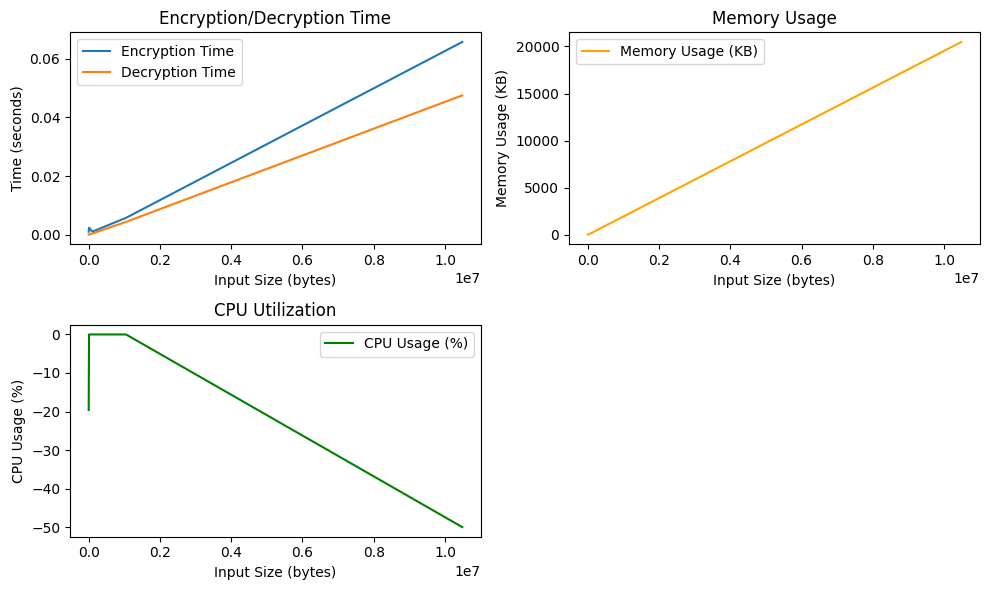

Recommendations for Optimization:
1. Use batch processing for large data sizes to minimize peak memory usage.
2. Ensure efficient key and IV management to reduce computation overhead.
3. Use hardware acceleration for cryptographic operations where available.


In [ ]:
def performance_testing():
    """Measures encryption/decryption speeds, memory usage, and CPU utilization for different input sizes."""
    key = generate_key()
    input_sizes = [1024, 10 * 1024, 100 * 1024, 1024 * 1024, 10 * 1024 * 1024]  # Sizes in bytes
    encryption_times = []
    decryption_times = []
    memory_usages = []
    cpu_usages = []

    for size in input_sizes:
        plaintext = "A" * size

        # Measure encryption performance
        start_time = time.time()
        tracemalloc.start()
        cpu_start = psutil.cpu_percent(interval=None)
        ciphertext, iv = encrypt_data(key, plaintext)
        cpu_end = psutil.cpu_percent(interval=None)
        current, peak = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        encryption_times.append(time.time() - start_time)
        memory_usages.append(peak / 1024)  # Convert to KB
        cpu_usages.append(cpu_end - cpu_start)

        # Measure decryption performance
        start_time = time.time()
        decrypt_data(key, ciphertext, iv)
        decryption_times.append(time.time() - start_time)

    # Plot results
    plt.figure(figsize=(10, 6))

    # Encryption/Decryption time
    plt.subplot(2, 2, 1)
    plt.plot(input_sizes, encryption_times, label="Encryption Time")
    plt.plot(input_sizes, decryption_times, label="Decryption Time")
    plt.xlabel("Input Size (bytes)")
    plt.ylabel("Time (seconds)")
    plt.title("Encryption/Decryption Time")
    plt.legend()

    # Memory usage
    plt.subplot(2, 2, 2)
    plt.plot(input_sizes, memory_usages, label="Memory Usage (KB)", color="orange")
    plt.xlabel("Input Size (bytes)")
    plt.ylabel("Memory Usage (KB)")
    plt.title("Memory Usage")
    plt.legend()

    # CPU usage
    plt.subplot(2, 2, 3)
    plt.plot(input_sizes, cpu_usages, label="CPU Usage (%)", color="green")
    plt.xlabel("Input Size (bytes)")
    plt.ylabel("CPU Usage (%)")
    plt.title("CPU Utilization")
    plt.legend()

    plt.tight_layout()
    plt.show()

    print("Recommendations for Optimization:")
    print("1. Use batch processing for large data sizes to minimize peak memory usage.")
    print("2. Ensure efficient key and IV management to reduce computation overhead.")
    print("3. Use hardware acceleration for cryptographic operations where available.")

if __name__ == "__main__":
    performance_testing()
